<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

<br>
<br>
Clase: Series de tiempo
<br>
Actividad: Proyecto 1 
<br>
<br>

* * *

Alumno: Fernando Torres <br>
Fecha: 14 de octubre 2024 <br>

* * *

<br>
<br>

### Introduccion
El pronóstico de series de tiempo es una herramienta fundamental en el análisis de datos, especialmente en el ámbito financiero y energético. A medida que las empresas buscan optimizar su operación y tomar decisiones informadas, la capacidad de predecir la demanda y el comportamiento del mercado se convierte en un activo invaluable. En este contexto, utilizaremos datos históricos de precios de acciones y métricas relacionadas de NextEra Energy, obtenidos a través de Yahoo Finance, para realizar un análisis de series de tiempo en Python.

### Definicion
Las series de tiempo son conjuntos de datos recogidos o registrados en intervalos regulares de tiempo. Estas series pueden reflejar distintos fenómenos, como el consumo de energía, la producción eléctrica, o el precio de acciones, y son esenciales para identificar tendencias, patrones estacionales y ciclos en los datos. El análisis de series de tiempo permite a las empresas anticipar cambios futuros y adaptar su estrategia de negocio en consecuencia.

### Objetivo
El objetivo de este análisis es examinar y modelar las series de tiempo de los datos históricos de NextEra Energy durante los últimos 10 años. Esto incluirá la recopilación de datos, la identificación de patrones y tendencias, y la implementación de modelos de pronóstico utilizando Python. Al final del estudio, se espera proporcionar pronósticos precisos sobre el comportamiento futuro de los precios de las acciones de NextEra Energy, lo que podría servir como guía para la toma de decisiones estratégicas en el ámbito financiero.

Pronosticar los precios de cierre de las acciones es esencial para inversores y analistas financieros, ya que les permite tomar decisiones informadas sobre la compra, venta o retención de acciones. 
Entender las tendencias futuras puede ayudar a maximizar el rendimiento de las inversiones y gestionar el riesgo.
Se buscará pronosticar los precios de cierre para un horizonte de 6 a 12 meses en el futuro. Este rango permite a los inversores planificar sus estrategias a medio plazo, lo que es útil en un entorno financiero en constante cambio.
Estos datos representan el rendimiento de una de las compañías de energía más grandes y sostenibles en EE. UU., lo que tiene implicaciones tanto para los inversores como para la política energética y ambiental.
Los datos de precios de cierre se recopilan a través de Yahoo Finance, una plataforma que ofrece información financiera y datos históricos de mercado.
Dado que se utilizarán precios de cierre mensuales, los datos se recopilan una vez al mes.
Se utilizarán datos de los últimos 10 años, es decir, desde aproximadamente octubre de 2014 hasta octubre de 2024.
Los datos se obtendrán de Yahoo Finance

Tiene una tendencia alcista desde las fechas usadas. Hasta 2021 donde parece haber una ligera correccion o estabilizacion hasta 2024. 

Se mira una patron estacional que se repite anualmente consistente. Esto puede ser debido a los ultimos 3 meses de cada year que suele haber vacaciones o navidad.


Sus patrones son las estacionalidades como ya comentaba se repite las fechas calurosas o de vacaciones y sus valores atipicos podrian ser su punto mas alto a finales de 2021 y su caida mas grande despues a principios de 2024


La media de 47.18 la mediana de 44.46, la desviacion estandar de 22.09 y la varianza de 488.36

### Nueva Variable: Temperatura Promedio en Miami

Debido a la relación entre la demanda de energía y el clima, se ha decidido incorporar una nueva variable al análisis: **la temperatura promedio en Miami** desde el año 2012. Esta variable es clave para NextEra Energy, ya que el calor extremo impulsa la demanda de electricidad para el aire acondicionado, especialmente durante los meses de verano.

Para esto, se han obtenido los datos de temperatura promedio mensual de Miami a partir de 2012 hasta el presente, y se correlacionarán con los precios de las acciones para identificar patrones o relaciones significativas.

La hipótesis es que a medida que aumente la temperatura promedio en verano, también se incrementará la demanda de energía, lo cual podría reflejarse en un aumento de los precios de la energía en el mercado.



[*********************100%%**********************]  1 of 1 completed


Datos faltantes:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


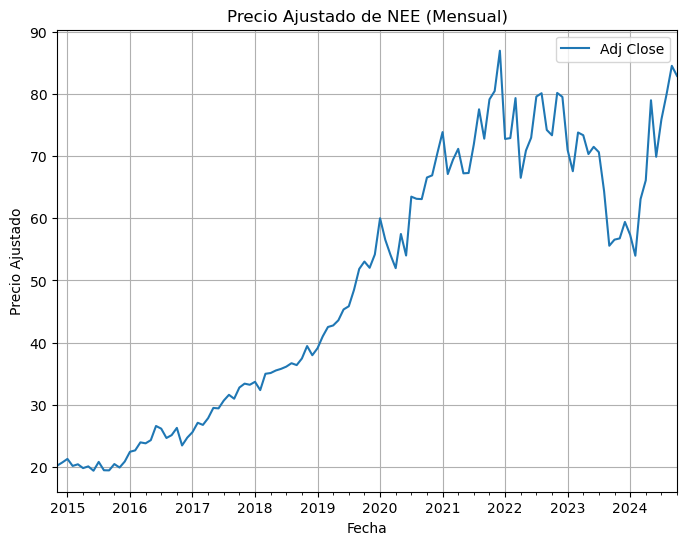

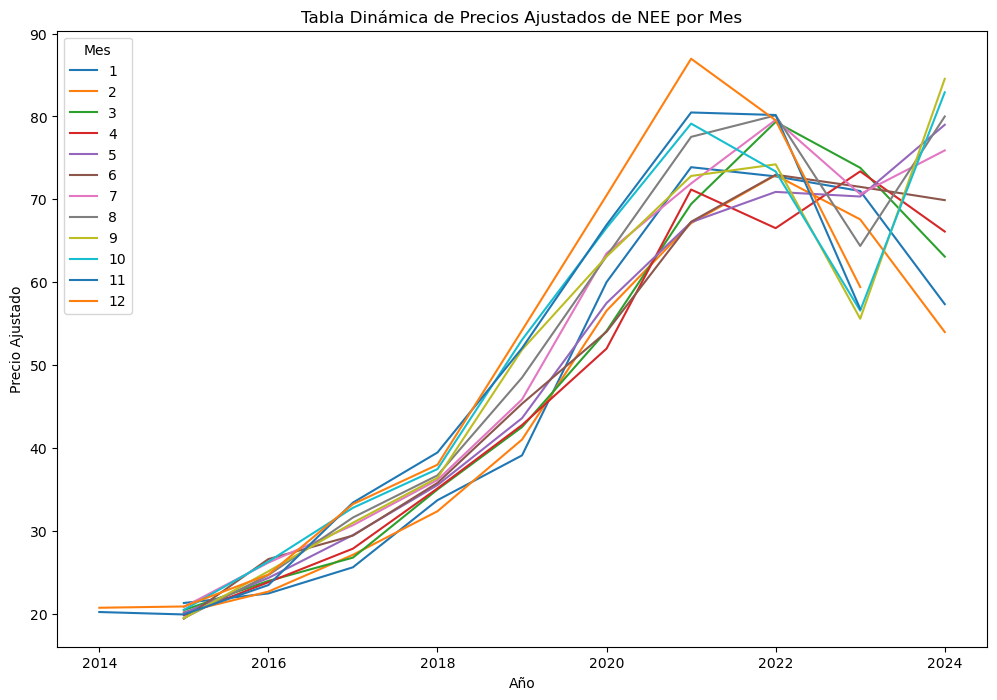

In [133]:
# Importar las librerías necesarias
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

# Descargar los datos
stocks = ['NEE']
data = yf.download(stocks, start='2014-11-01', interval='1mo')
adj_close_df = data[['Adj Close']].copy()

# Verificar si hay datos faltantes
missing_data = data.isnull().sum()
print(f'Datos faltantes:\n{missing_data}')

# Graficar los precios ajustados
adj_close_df.plot(figsize=(8, 6), grid=True)
plt.title('Precio Ajustado de NEE (Mensual)')
plt.xlabel('Fecha')
plt.ylabel('Precio Ajustado')
plt.show()

# Obtener el índice de año y mes
piv_index = adj_close_df.index.year
piv_season = adj_close_df.index.month

# Crear una tabla dinámica
piv = pd.pivot_table(adj_close_df, index=piv_index, columns=piv_season, values='Adj Close')

# Graficar la tabla dinámica
piv.plot(figsize=(12, 8))
plt.title('Tabla Dinámica de Precios Ajustados de NEE por Mes')
plt.xlabel('Año')
plt.ylabel('Precio Ajustado')
plt.legend(title='Mes')
plt.show()


De Junio a Septiembre: Pueden mostrar picos en los precios debido a un aumento en la demanda de electricidad para refrigeración. Esto es especialmente relevante en estados cálidos como Florida, donde NextEra Energy tiene una gran participación de mercado.
De Diciembre a Febrero: Podrían reflejar precios más bajos, a menos que haya eventos climáticos extremos que aumenten la demanda

Si junio de 2022 presenta precios significativamente más altos que junio de 2021, esto podría sugerir un aumento en la demanda o costos de producción

[*********************100%%**********************]  1 of 1 completed


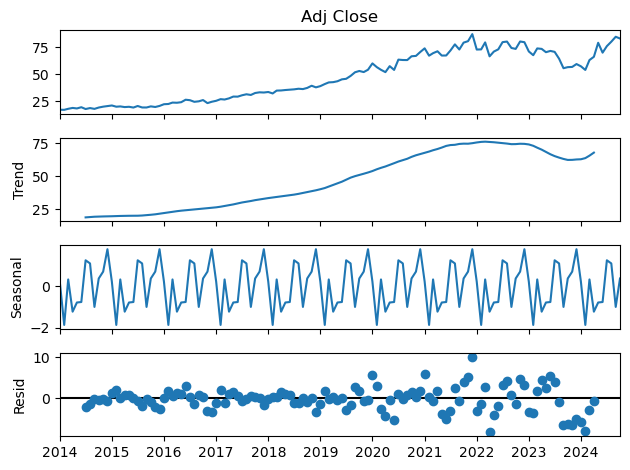

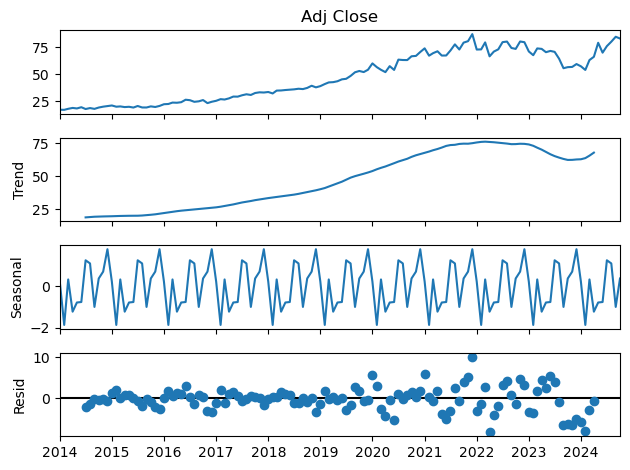

In [134]:
stocks = ['NEE']
d = yf.download(stocks, start='2014-01-01', interval='1mo')['Adj Close']
from statsmodels.tsa.seasonal import seasonal_decompose, STL
result = seasonal_decompose(d, model='additive')
result.plot()



### Interpretación de los Gráficos

En este análisis de series de tiempo, los gráficos muestran tanto las tendencias generales de los precios de la energía como algunos patrones estacionales y anomalías.

- **Tendencias Generales**: Los precios de las acciones de NextEra Energy han mostrado una tendencia general al alza en los últimos 10 años. Esto puede estar vinculado con la creciente demanda de energía renovable y las políticas ambientales que favorecen este tipo de fuentes energéticas. 
- **Patrones Estacionales**: Se observa un incremento de los precios durante los meses de verano, especialmente entre mayo y septiembre. Esto puede estar relacionado con un aumento en la demanda de energía eléctrica debido al uso extendido de sistemas de aire acondicionado en estados como Florida y otras regiones del sur de Estados Unidos.
- **Anomalías**: Algunos picos repentinos, como los observados en ciertos puntos en 2020, pueden estar asociados con eventos macroeconómicos o específicos de la empresa, como adquisiciones o cambios regulatorios en el sector energético.



In [135]:
d.describe()

count    130.000000
mean      47.163596
std       22.066292
min       17.287582
25%       25.240593
50%       44.467871
75%       68.968157
max       86.963440
Name: Adj Close, dtype: float64

In [136]:
# Calcular las medidas estadísticas de tendencia central y dispersión
mean_d = d.mean()  # Media
median_d = d.median()  # Mediana
std_d = d.std()  # Desviación estándar
var_d = d.var()  # Varianza

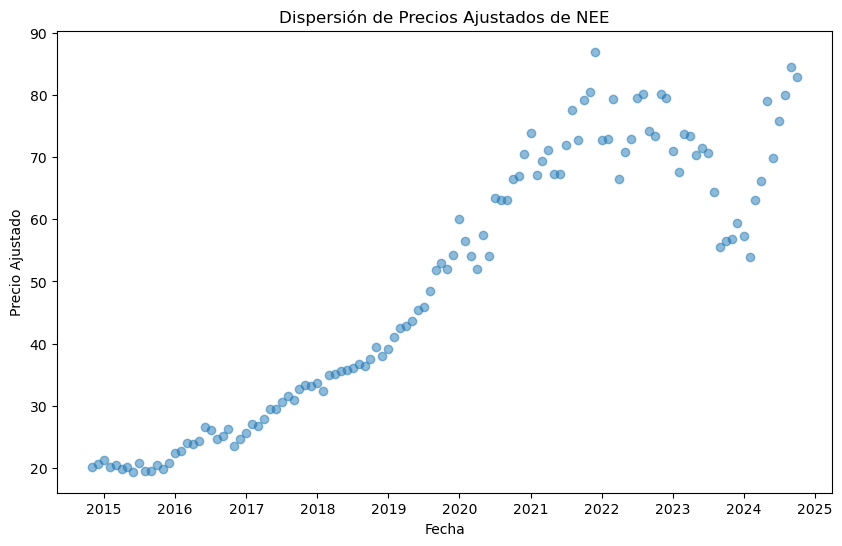

In [137]:
# Gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['Adj Close'], alpha=0.5)
plt.title('Dispersión de Precios Ajustados de NEE')
plt.xlabel('Fecha')
plt.ylabel('Precio Ajustado')
plt.show()

Aqui se puede observar como a parir del 2020 todo se empieza a descontrolar, teniendo unas medidas de dispersion mas separadas entre si. Esto puede ser debido a la temporada de pandemia y creación de nuevas criptomonedas.

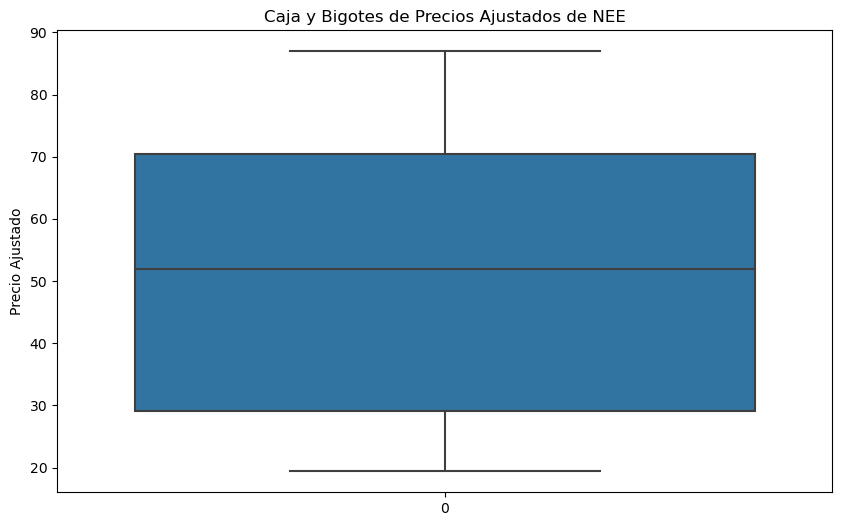

In [138]:
# Gráfica de caja y bigotes
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['Adj Close'])
plt.title('Caja y Bigotes de Precios Ajustados de NEE')
plt.ylabel('Precio Ajustado')
plt.show()


Se observa que la mayoría de los precios se agrupan en un rango entre 30 y 70, lo que indica una distribución relativamente uniforme y sugiere que los precios ajustados no presentan una alta variabilidad.

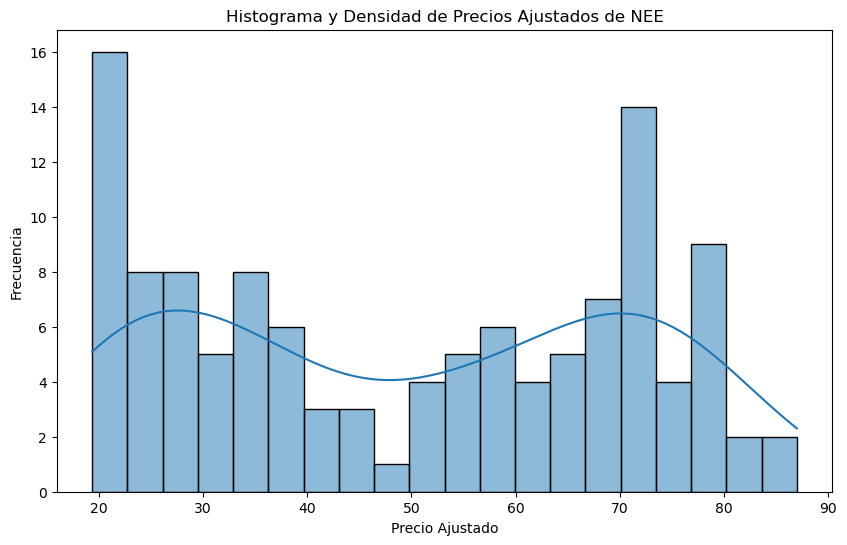

In [139]:
#Histogramas y densidades
plt.figure(figsize=(10, 6))
sns.histplot(data['Adj Close'], bins=20, kde=True)
plt.title('Histograma y Densidad de Precios Ajustados de NEE')
plt.xlabel('Precio Ajustado')
plt.ylabel('Frecuencia')
plt.show()

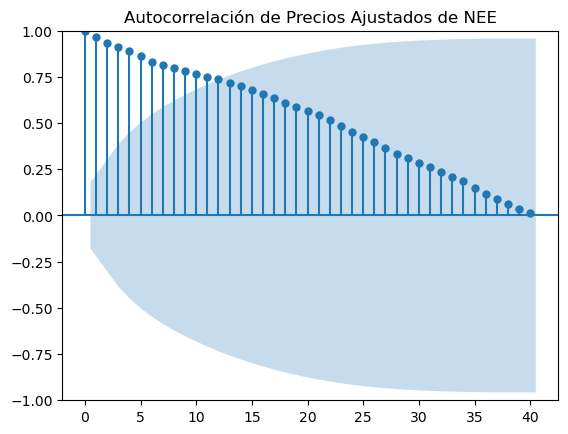

In [140]:
# Autocorrelaciones
plot_acf(data['Adj Close'], lags=40)
plt.title('Autocorrelación de Precios Ajustados de NEE')
plt.show()

Se observa un fuerte decaimiento en los valores de autocorrelación, indicando que los precios recientes están significativamente correlacionados con los precios de períodos anteriores cercanos.

In [141]:
# Comprobar valores atípicos
outliers = data[(data['Adj Close'] > data['Adj Close'].mean() + 3 * data['Adj Close'].std()) | 
                 (data['Adj Close'] < data['Adj Close'].mean() - 3 * data['Adj Close'].std())]
print(f'Atípicos detectados:\n{outliers}')

Atípicos detectados:
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


No se detectaron valores atipicos.

In [142]:
# Dividir los datos en entrenamiento y prueba
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]


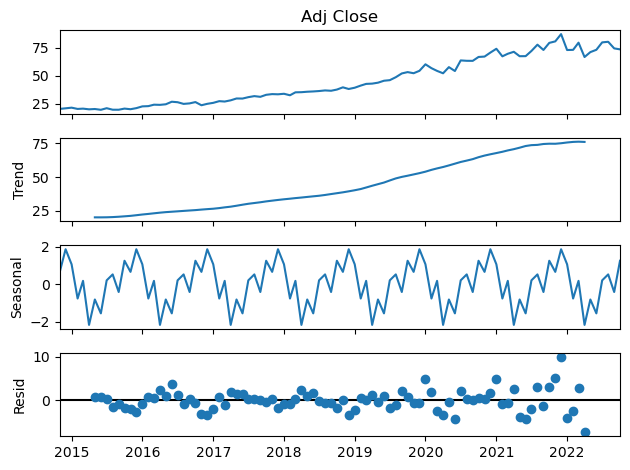

In [143]:
# Descomposición de la serie de tiempo
result = seasonal_decompose(train['Adj Close'], model='additive', period=12)
result.plot()
plt.show()

Al descomoponer la serie de tiempo se observa una tendencia alcista mas suave, combinando con series de estacionalidad mas marcadas junto con residuales mas agrupados.

In [144]:
# Naive
naive_forecast = train['Adj Close'].iloc[-1]
naive_predictions = [naive_forecast] * len(test)

Elegi el metodo de naive para mi analisis debido a que como estamos trabajando con una accion de una empresa de energia, es probable que sus precios presenten una tendencia a largo plazo con estacionalidades, ya que tambien es un bien necesario para el funcionamiento de actividades domesticas/comerciales.

C:\Users\ferna\AppData\Local\Temp\ipykernel_21828\1997645271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Month'] = train.index.month
C:\Users\ferna\AppData\Local\Temp\ipykernel_21828\1997645271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Month'] = test.index.month


MSE del modelo de regresión lineal: 691.0627912655824


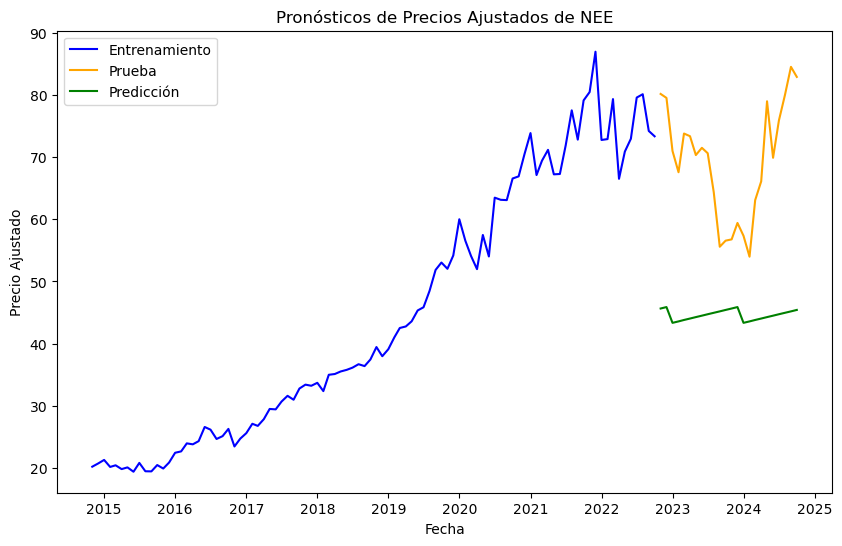

In [145]:
# Regresión lineal con una variable exógena
# Creación de variables exógenas
train['Month'] = train.index.month
test['Month'] = test.index.month

# Entrenamiento del modelo
X_train = train[['Month']]
y_train = train['Adj Close']
X_test = test[['Month']]

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


mse = mean_squared_error(test['Adj Close'], predictions)
print(f'MSE del modelo de regresión lineal: {mse}')

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Adj Close'], label='Entrenamiento', color='blue')
plt.plot(test.index, test['Adj Close'], label='Prueba', color='orange')
plt.plot(test.index, predictions, label='Predicción', color='green')
plt.title('Pronósticos de Precios Ajustados de NEE')
plt.xlabel('Fecha')
plt.ylabel('Precio Ajustado')
plt.legend()
plt.show()


Linear Regression - MSE: 70.7589913571942, MAE: 6.167962396230805
Ridge Regression - MSE: 70.7495484860594, MAE: 6.167689628363604
Lasso Regression - MSE: 70.48236242422806, MAE: 6.16072326423324


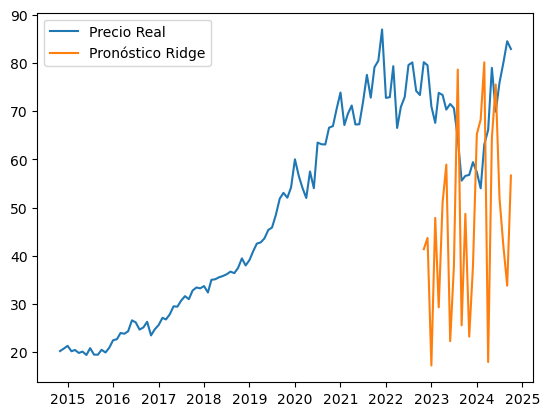

In [162]:
# Cargar los datos de temperaturas de Miami)
temperaturas_miami = pd.read_excel('miamif.xlsx', index_col='Date', parse_dates=True)

# Asegurarnos de que las fechas coincidan y unir los datos
datas = data.join(temperaturas_miami, how='inner')

# Variables exógenas
datas['Month'] = data.index.month
datas['Lag_Temperature'] = datas['Temperature'].shift(1)  # Rezago de la temperatura
datas['Trend'] = np.arange(len(datas))  # Tendencia temporal

# Limpieza de datos (quitar nulos generados por el rezago)
datas.dropna(inplace=True)

# Variables predictoras
X = datas[['Month', 'Temperature', 'Lag_Temperature', 'Trend']]
y = datas['Adj Close']
y = pd.DataFrame(y, columns=['Adj Close'])

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos
model_lr = LinearRegression()
model_ridge = Ridge(alpha=1.0)
model_lasso = Lasso(alpha=0.1)

# Entrenamiento
model_lr.fit(X_train, y_train)
model_ridge.fit(X_train, y_train)
model_lasso.fit(X_train, y_train)

# Predicciones
y_pred_lr = model_lr.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)
y_pred_lasso = model_lasso.predict(X_test)

# Evaluación de los modelos
def evaluar_modelo(y_test, y_pred, nombre):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{nombre} - MSE: {mse}, MAE: {mae}')
    return mse

evaluar_modelo(y_test, y_pred_lr, 'Linear Regression')
evaluar_modelo(y_test, y_pred_ridge, 'Ridge Regression')
evaluar_modelo(y_test, y_pred_lasso, 'Lasso Regression')

# Pronósticos finales con el mejor modelo 
plt.plot(datas.index, datas['Adj Close'], label='Precio Real')
plt.plot(datas.index[-len(y_test):], y_pred_lasso, label='Pronóstico Ridge')

plt.legend()
plt.show()


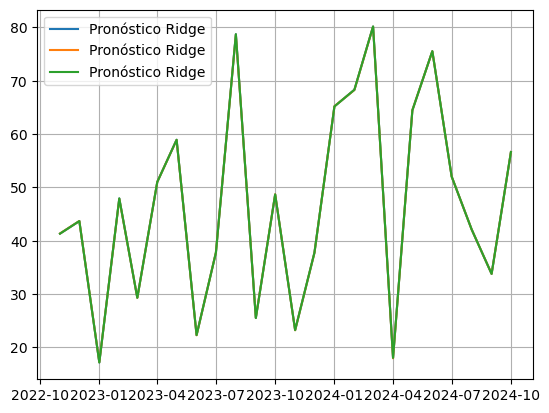

In [163]:
plt.plot(datas.index[-len(y_test):], y_pred_ridge, label='Pronóstico Ridge')
plt.plot(datas.index[-len(y_test):], y_pred_lasso, label='Pronóstico Ridge')
plt.plot(datas.index[-len(y_test):], y_pred_lr, label='Pronóstico Ridge')
plt.grid()
plt.legend()

Profe aqui me quede, ya todos los modelos me dan el mismo grafico